In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as n
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import pickle
import numpy.lib.recfunctions as rfn

In [2]:
from modules import utils

### Load the data

In [3]:
data_file = 'data/all_data.p'

f = open(data_file, 'rb')
all_data = pickle.load(f)

In [4]:
experiment = all_data['Female1']

In [5]:
# Save timestamps into variable
ts = experiment['t']
# Save annotations into variable
annotations = experiment['ann']

## Calculate some features

In [6]:
vectors = {'rear_1' : ('ImplantedTailBase_1', 'BackCenter_1'),
           'rear_2' : ('InteracteeTailBase_2', 'BackCenter_2'),
           'front_1': ('BackCenter_1', 'NapeCenter_1'),
           'front_2': ('BackCenter_2', 'NapeCenter_2'),
           'head_1' : ('NapeCenter_1', ('GreenTape_1', 'RedTape_1')),
           'head_2' : ('NapeCenter_2', ('YellowEar_2', 'OrangeEar_2')),
           'front_1_to_front_2' : ('NapeCenter_1', 'NapeCenter_2'),
           'front_2_to_front_1' : ('NapeCenter_2', 'NapeCenter_1'),
           'front_1_to_rear_2' : ('NapeCenter_1', 'InteracteeTailBase_2'),
           'front_2_to_rear_1' : ('NapeCenter_2', 'ImplantedTailBase_1'),
           'rear_1_to_rear_2' : ('BackCenter_1','BackCenter_2'),
           'rear_2_to_rear_1' : ('BackCenter_2','BackCenter_1')}
velocities_to_calculate = [
    'BackCenter_1',
    'BackCenter_2',
]

In [7]:
exp = utils.compute_and_add_vectors(experiment,vectors)
exp = utils.compute_and_add_velocities(exp, velocities_to_calculate)

## Format your dataset

In [8]:
from sklearn import preprocessing

In [9]:
labels = exp['ann']
unique_labels = n.unique(labels)
ts = exp['t']
features_to_use = [
    'rear_1_ang',
    'front_1_ang',
    'head_1_ang',
    'rear_1_ang',
    'front_1_ang',
    'head_1_ang',
    'BackCenter_1_vel_mag',
    'BackCenter_1_vel_ang',
    'rear_2_ang',
    'front_2_ang',
    'head_2_ang',
    'rear_2_ang',
    'front_2_ang',
    'head_2_ang',
    'BackCenter_2_vel_mag',
    'BackCenter_2_vel_ang',
]

In [10]:
n_timepoints = len(ts)
n_features = len(features_to_use)

Xs = n.zeros((n_timepoints, n_features))
Ys = n.zeros(n_timepoints)

In [11]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(unique_labels)
Ys = label_encoder.transform(labels)

In [12]:
for i in range(n_features):
    Xs[:,i] = exp[features_to_use[i]]
Xs[n.isnan(Xs)] = 0

(15000.0, 16000.0)

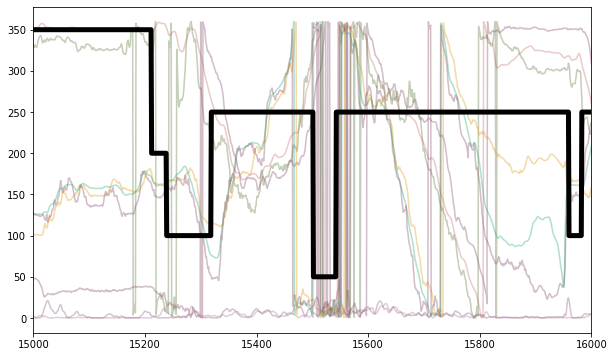

In [13]:
plt.plot(Xs, label=features_to_use, alpha=.2)
plt.plot(Ys*50, color='k', linewidth=5)
plt.xlim(15000,16000)

## Do Unsupervised Clustering


In [15]:
from sklearn.manifold import TSNE

In [16]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


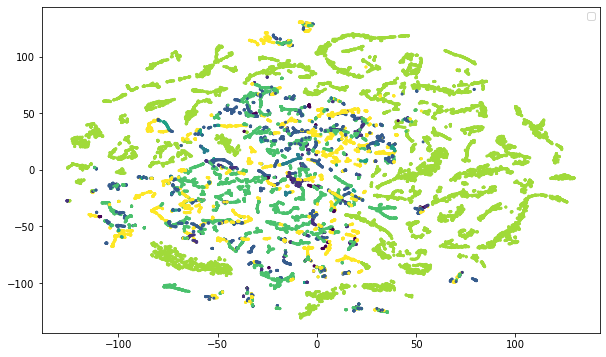

In [20]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=Ys, s=4)
plt.legend()